In [22]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df=pd.read_csv('GPA_business_case_Dataset.csv')

In [3]:
df.head()

,AdID,UserID,StartDate,StartTime,AskingPrice,ParentCategory,Category,AdType,NumberofReplies,NumberOfPhotos
0,1130838526,1002781115,1/7/2016,2:46:57,0.01,pets,fish for sale,For Sale,4,2
1,1134972586,52373435,1/23/2016,21:43:30,815.00,real estate,"apartments, condos",For Sale,3,9
2,1135195447,1001422061,1/25/2016,0:31:03,95.00,buy and sell,electronics,For Sale,3,2
3,1132922786,61778180,1/15/2016,15:48:02,699900.00,real estate,houses for sale,For Sale,1,10
4,1136201259,53431649,1/28/2016,20:55:44,340.00,buy and sell,furniture,For Sale,5,7


In [4]:
#number of unique users
df['UserID'].nunique()

485242

In [5]:
#number of unique ads
df['AdID'].nunique()

1048575

In [6]:
#number of unique dates
df['StartDate'].nunique()

31

In [7]:
#Converting time to hour
df['hour'] = pd.to_datetime(df['StartTime'], format='%H:%M:%S').dt.hour

<AxesSubplot:>

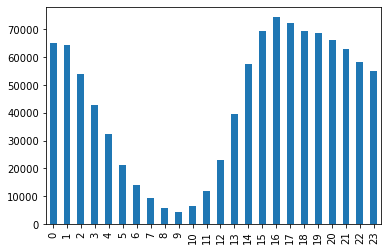

In [8]:
#At hour 16 most number of ads are coming in
#This is sorted by time of day
df.hour.value_counts().sort_index().plot(kind = 'bar')

<AxesSubplot:>

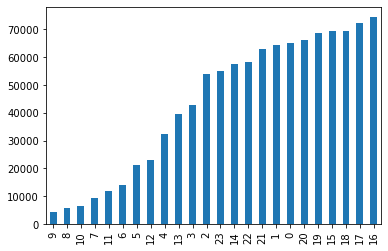

In [9]:
#this is sorted by number of products added by time
df.hour.value_counts().sort_values().plot(kind = 'bar')

In [10]:
#number of unique adtypes.
df['AdType'].nunique()

3

In [11]:
#These are the unique ad types. there must be some relevance for these too
df['AdType'].unique()

array(['For Sale', 'Wanted', 'Null'], dtype=object)

In [12]:
#count of each adtype
df.groupby(['AdType'])['AdID'].count()

AdType
For Sale    1013450
Null            129
Wanted        34996
Name: AdID, dtype: int64

In [16]:
#Percentage of each adtype
df.AdType.value_counts()/sum(df.AdType.value_counts())*100.0

For Sale    96.650216
Wanted       3.337482
Null         0.012302
Name: AdType, dtype: float64

In [13]:
#number of unique parent categories.
df['ParentCategory'].nunique()

9

In [14]:
#count of each parent category
df.groupby(['ParentCategory'])['AdID'].count()

ParentCategory
buy and sell        656417
cars & vehicles     135612
community             9955
jobs                 18369
pets                 20076
real estate          88532
resumes               6277
services            112143
vacation rentals      1194
Name: AdID, dtype: int64

In [15]:
#Percentage of each parent category
df.ParentCategory.value_counts()/sum(df.ParentCategory.value_counts())*100.0

buy and sell        62.600863
cars & vehicles     12.932980
services            10.694800
real estate          8.443078
pets                 1.914598
jobs                 1.751806
community            0.949384
resumes              0.598622
vacation rentals     0.113869
Name: ParentCategory, dtype: float64

In [17]:
#number of unique categories.
df['Category'].nunique()

107

In [18]:
#Percentage of each parent category
df.Category.value_counts()/sum(df.Category.value_counts())*100.0

furniture                  7.179458
clothing                   6.075865
auto parts, tires          5.326372
other                      4.302697
phones                     4.128365
                             ...   
Mexico                     0.007439
missed connections         0.006485
long lost relationships    0.004005
Caribbean                  0.002956
Other Countries            0.002098
Name: Category, Length: 107, dtype: float64

In [19]:
#Creating a new variable to identify if products have replies or not
df['is_replied'] = np.where(
     df['NumberofReplies']==0, 
    'no', 
     np.where(
        df['NumberofReplies']>0, 'yes', 'Unknown'
     )
)



In [20]:
#Finding Ad categories with most ad views
grouped = df.groupby(['ParentCategory','is_replied']).agg({'AdID': 'count'})
# Change: groupby state_office and divide by sum
replies_pcts = grouped.groupby(level=0).apply(lambda x:
                                                 100 * x / float(x.sum()))
data=replies_pcts.reset_index()
data

,ParentCategory,is_replied,AdID
0,buy and sell,no,49.788625
1,buy and sell,yes,50.211375
2,cars & vehicles,no,41.352535
3,cars & vehicles,yes,58.647465
4,community,no,59.397288
5,community,yes,40.602712
6,jobs,no,20.599924
7,jobs,yes,79.400076
8,pets,no,31.191472
9,pets,yes,68.808528


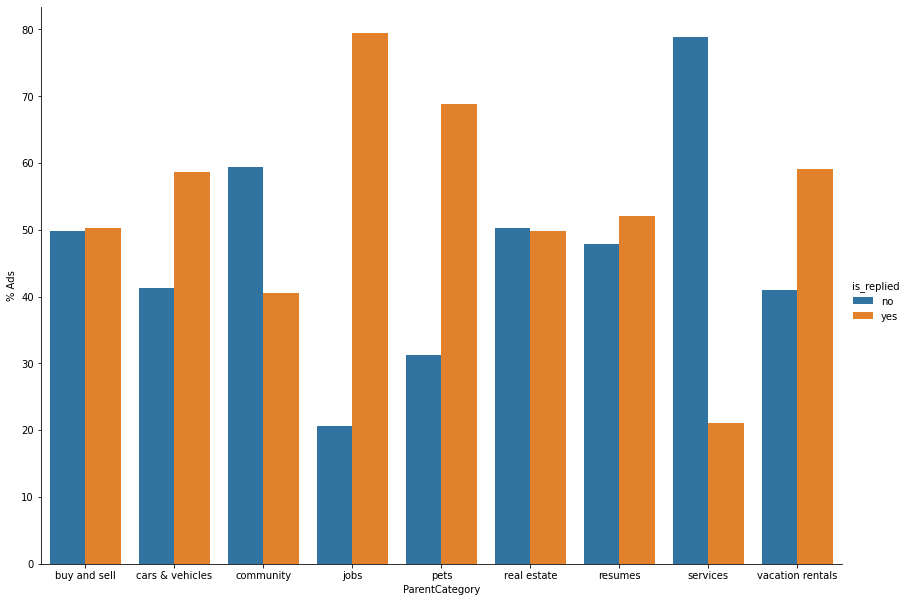

In [23]:
#Visualising products with replies

g = sns.catplot(x='ParentCategory', y='AdID', hue='is_replied', kind='bar', data=data,height=8.27, aspect=11.7/8.27)
# g.ax.set_ylim(0,100)
g.set(ylabel = "% Ads")

<AxesSubplot:>

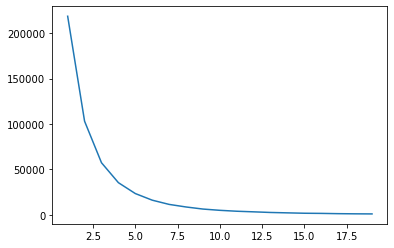

In [24]:
#visual for distribution of number of replies
data=df[df['NumberofReplies']>0]
data = data[data['NumberofReplies']<20]
data.NumberofReplies.value_counts().sort_index().plot()

In [25]:
#Most products get less than 2 replies. And afte 10 replies the graph tends to be very low and stabilizes

<AxesSubplot:xlabel='ParentCategory', ylabel='% of total ads'>

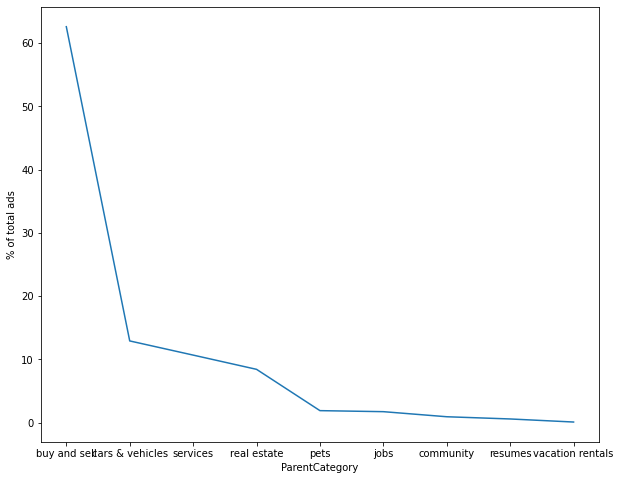

In [26]:
#finding which category have most ads
data=df.ParentCategory.value_counts()/sum(df.ParentCategory.value_counts())*100.0
data.plot(figsize=(10,8),xlabel='ParentCategory',ylabel='% of total ads')

In [28]:
#as can be seen in the graph above and also in the below counts. 62% of the ads are from buy and sell categories.
data

buy and sell        62.600863
cars & vehicles     12.932980
services            10.694800
real estate          8.443078
pets                 1.914598
jobs                 1.751806
community            0.949384
resumes              0.598622
vacation rentals     0.113869
Name: ParentCategory, dtype: float64

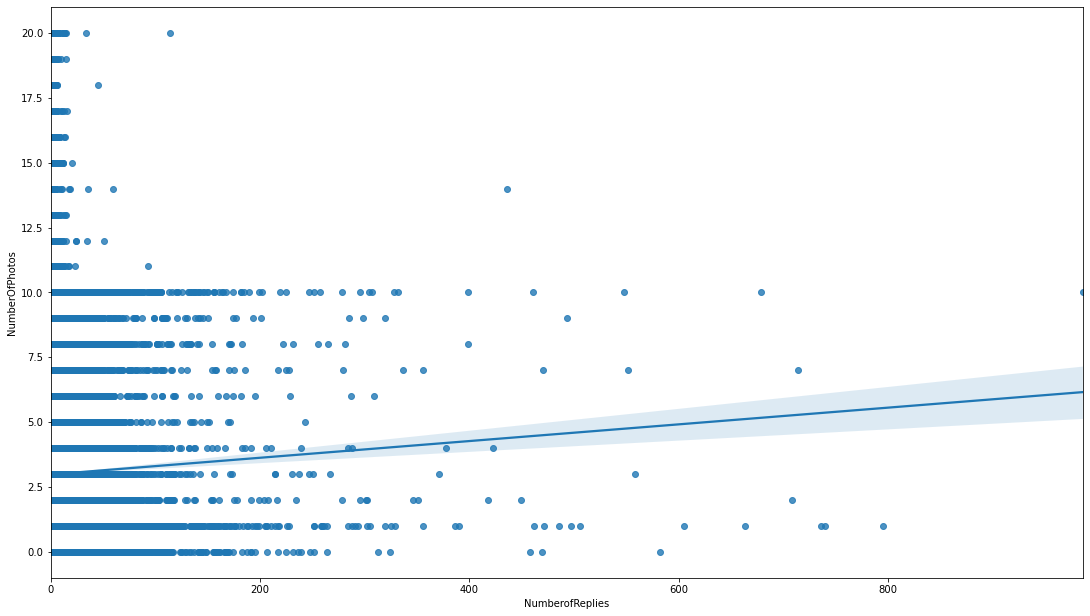

In [31]:
#Number of replies vs number of photos
g= sns.regplot(x=df["NumberofReplies"], y=df["NumberOfPhotos"])
g.figure.set_size_inches(18.5, 10.5)

In [32]:
#listing in more than 1 category
df.groupby(['UserID','ParentCategory'])['AdID'].count().reset_index()

,UserID,ParentCategory,AdID
0,2106,buy and sell,2
1,2345,services,2
2,3122,buy and sell,1
3,6397,buy and sell,1
4,6558,services,1
...,...,...,...
516336,1005159139,jobs,1
516337,1005159300,services,1
516338,1005159301,services,1
516339,1005159306,buy and sell,1


In [34]:
print("90th percentile of arr : ",
       np.percentile(df['AskingPrice'], 90))
print("25th percentile of arr : ",
       np.percentile(df['AskingPrice'], 25))

90th percentile of arr :  1000.0
25th percentile of arr :  0.0


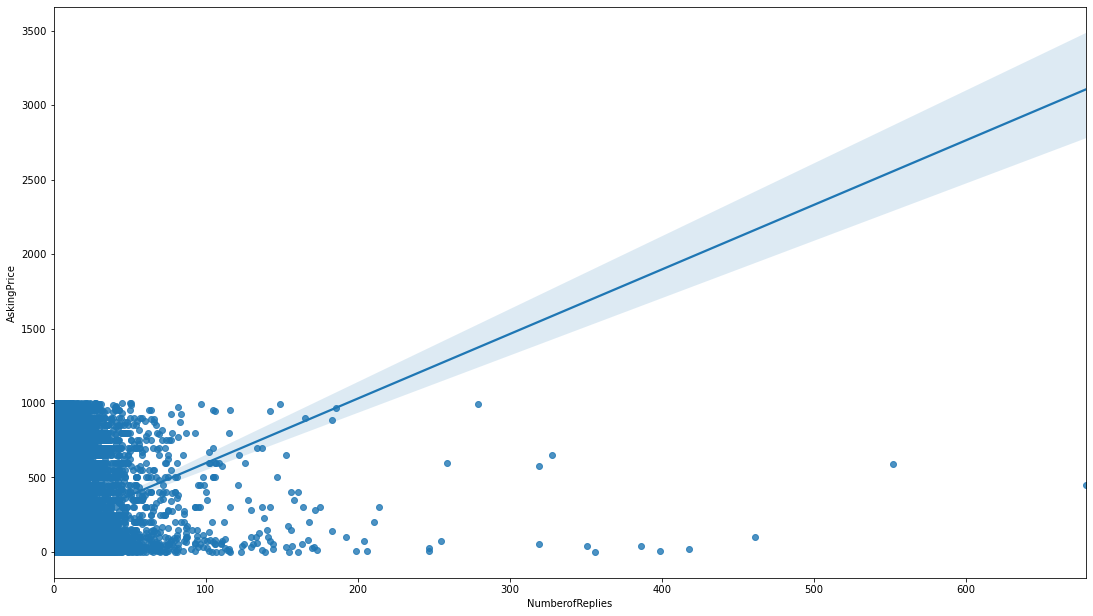

In [35]:
#getting data between 25th and 90th percentile and plotting
data=df[(df["AskingPrice"]>0) & (df["AskingPrice"]<1000)]
g=sns.regplot(x=data["NumberofReplies"], y=data["AskingPrice"])
g.figure.set_size_inches(18.5, 10.5)

In [38]:
#Modelling to find Feature importance and number of replies
from sklearn import preprocessing
data=df[['AskingPrice','ParentCategory','Category','NumberofReplies','NumberOfPhotos','hour']]
le = preprocessing.LabelEncoder()
  
data['ParentCategory']= le.fit_transform(data['ParentCategory'])
data['Category']= le.fit_transform(data['Category'])

<ipython-input-38-d67d36d53fcd>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ParentCategory']= le.fit_transform(data['ParentCategory'])
<ipython-input-38-d67d36d53fcd>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Category']= le.fit_transform(data['Category'])


0.5097694396972656
[[130696   3070    142 ...      0      0      0]
 [ 51428   2788    156 ...      0      0      0]
 [ 23961   1724    126 ...      0      0      0]
 ...
 [     1      0      0 ...      0      0      0]
 [     1      0      0 ...      0      0      0]
 [     1      0      0 ...      0      0      0]]


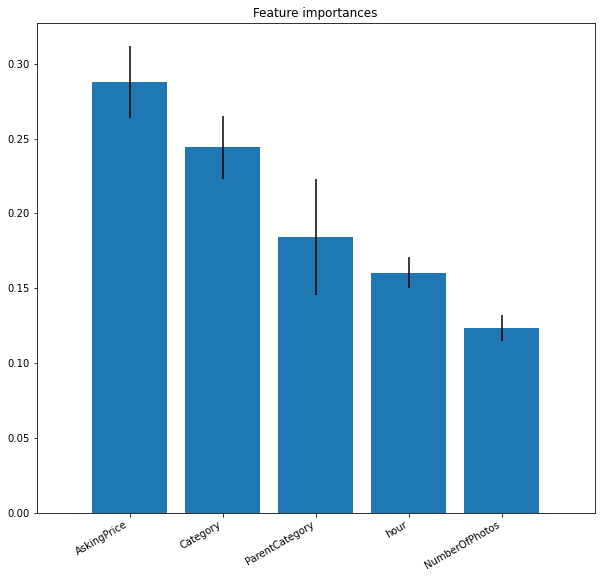

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
X_train, X_test, y_train, y_test = train_test_split(data.drop('NumberofReplies',axis=1),data['NumberofReplies'])
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(min_samples_leaf=20, n_estimators=200).fit(X_train,y_train)
rf_pred = rf.predict(X_test)
print(rf.score(X_test,y_test))
print(confusion_matrix(y_test,rf_pred))
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
col_name = data.drop('NumberofReplies',axis=1).columns.values
# Plot the feature importances of the forest
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,10))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]),
        importances[indices],
        yerr=std[indices],
        align="center")
plt.xticks(range(X_train.shape[1]), np.array(col_name)[indices])
plt.xlim([-1, X_train.shape[1]])
fig.autofmt_xdate()
plt.show()

In [40]:
data=df[['AskingPrice','ParentCategory','NumberofReplies','NumberOfPhotos','hour']]
one_hot = pd.get_dummies(data['ParentCategory'])
# Drop column B as it is now encoded
data = data.drop('ParentCategory',axis = 1)
# Join the encoded data
data = data.join(one_hot)
data 

,AskingPrice,NumberofReplies,NumberOfPhotos,hour,buy and sell,cars & vehicles,community,jobs,pets,real estate,resumes,services,vacation rentals
0,0.01,4,2,2,0,0,0,0,1,0,0,0,0
1,815.00,3,9,21,0,0,0,0,0,1,0,0,0
2,95.00,3,2,0,1,0,0,0,0,0,0,0,0
3,699900.00,1,10,15,0,0,0,0,0,1,0,0,0
4,340.00,5,7,20,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,0.00,0,4,1,0,0,0,0,0,0,0,1,0
1048571,550.00,0,3,21,0,1,0,0,0,0,0,0,0
1048572,300.00,0,1,15,0,1,0,0,0,0,0,0,0
1048573,0.00,0,5,13,1,0,0,0,0,0,0,0,0


0.5070037841796875
[[131424   1721     55 ...      0      0      0]
 [ 53442   1438     53 ...      0      0      0]
 [ 24965    864     46 ...      0      0      0]
 ...
 [     1      0      0 ...      0      0      0]
 [     1      0      0 ...      0      0      0]
 [     1      0      0 ...      0      0      0]]


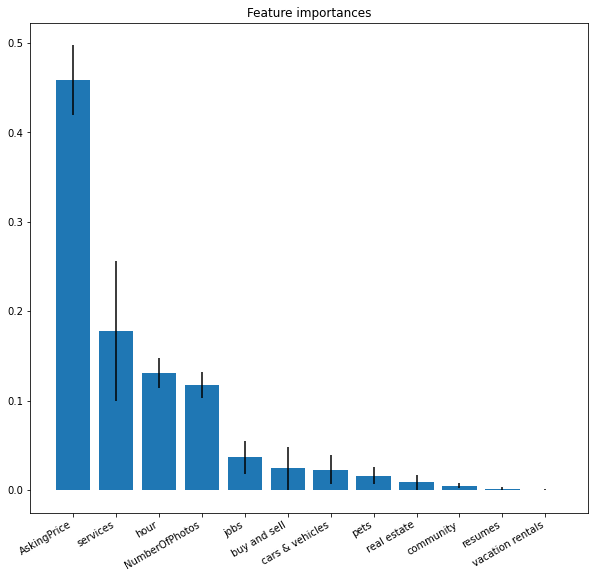

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
X_train, X_test, y_train, y_test = train_test_split(data.drop('NumberofReplies',axis=1),data['NumberofReplies'])
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(min_samples_leaf=20, n_estimators=200).fit(X_train,y_train)
# from sklearn.model_selection import GridSearchCV
# param = {'n_estimators':[500,200,100],'min_samples_leaf':[10,20,50]}
# grid = GridSearchCV(clf,param).fit(X_train,y_train)
# print(grid.best_params_)
rf_pred = rf.predict(X_test)
print(rf.score(X_test,y_test))
print(confusion_matrix(y_test,rf_pred))
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
col_name = data.drop('NumberofReplies',axis=1).columns.values
# Plot the feature importances of the forest
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,10))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]),
        importances[indices],
        yerr=std[indices],
        align="center")
plt.xticks(range(X_train.shape[1]), np.array(col_name)[indices])
plt.xlim([-1, X_train.shape[1]])
fig.autofmt_xdate()
plt.show()

In [42]:
#looking at most costly pets
df[df.ParentCategory=='pets'][['AskingPrice','Category','NumberofReplies']].sort_values(by='AskingPrice').tail(10)

,AskingPrice,Category,NumberofReplies
574482,42500.0,"equestrian, livestock accessories",0
66563,45000.0,livestock for sale,7
366093,100000.0,"cats, kittens for sale",1
185330,123456.0,"dogs, puppies for sale",8
84552,737377.0,"cats, kittens for sale",1
472908,1000000.0,"cats, kittens for sale",20
685093,1000000.0,other,0
497719,1000000.0,other,5
431224,19999999.0,"cats, kittens for sale",15
827718,99999999.0,livestock for sale,0


In [43]:
#Looking at most costly real estate
df[df.ParentCategory=='real estate'][['AskingPrice','Category','NumberofReplies']].sort_values(by='AskingPrice').tail(10)

,AskingPrice,Category,NumberofReplies
857807,7900000.0,land for sale,0
66251,8500000.0,houses for sale,1
506650,8775000.0,land for sale,0
181928,9999999.0,land for sale,2
50869,10000000.0,land for sale,4
245531,14000000.0,other,3
938752,15478300.0,land for sale,0
952296,15600000.0,land for sale,0
350369,17250000.0,houses for sale,1
600231,17295300.0,land for sale,0
